<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

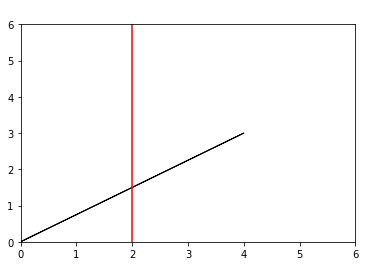

In [3]:
# create graph passing vertical line test
plt.arrow(0, 0, 4, 3)
plt.axvline(x=2,color='r')
plt.xlim(0,6)
plt.ylim(0,6)
plt.title('Graph of a Function', color='w', fontsize=15)
plt.show()

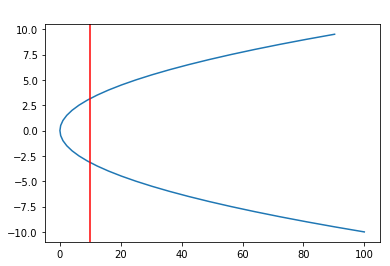

In [4]:
# create graph that fails the Vertical line test

y = np.arange(-10, 10, .5)
x = np.power(y, 2)

plt.plot(x,y)
plt.axvline(x=10, color='r')
plt.title('Graph of a Non-Function', color='w', fontsize=15)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because they return two x values for a single y value. In real life on any given day in any exact location and time, it cannot be both 99 degrees farenheit and 32 degrees farenheit

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only relation 2, all other relations fail the vertical line test.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

input:m = R^3<br/>
output:m = R^3<br/>
input: n = R^4<br/>
output: n = R^2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

would it be something like multiplying by a matrix with more columns. So say you had a 3X2 matrix and you multiplied it by a 2X3 matrix. I believe that would raise it'd dimensions. The example is the previous example 3.1. n maps from a higher dimensional space to a lower dimensional space. The reverse is also true.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
# Transformation of p
Tp = np.array([[1, 3],
               [-1, 2]])

# Transformation of q

Tq = np.array([[4, 1, 2], 
               [-1, 2, 3], 
               [5, 1, -2]])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [6]:
# traditional function method
test_p = np.array([2, 5])
test_q = np.array([1, 2, 5])

# with list
p_of_x = [test_p[0] + 3*test_p[1],
          2*test_p[1] - test_p[0]]

q_of_x = [4*test_q[0] + test_q[1] + 2*test_q[2],
         2*test_q[1] - test_q[0] + 3*test_q[2],
         5*test_q[0] - 2*test_q[2] + test_q[1]]

# checking work
p_of_x1 = [2 + 3*5,
           2*5 - 2]

# outputs
print('p(x): ', p_of_x)
print('q(x): ', q_of_x)

p(x):  [17, 8]
q(x):  [16, 18, -3]


In [7]:
# with matrix multiplication
mm_p = np.matmul(Tp, test_p)
mm_q = np.matmul(Tq, test_q)

check = np.array([[2, 1],
                  [-1, 1]])

check_a = np.array([3, 4])

mm_checka = check*check_a
mm_check = np.matmul(check, check_a)
                  
# outputs
print(mm_check)
print('p(x): ',mm_p)
print('q(x): ',mm_q)

[10  1]
p(x):  [17  8]
q(x):  [16 18 -3]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are the axis along which the transformation of your vector takes place. <br/>
Eigenvalues are how much the axis is scaled during the transformation.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

It is hard to visualize. Due to their size, the amount of computing time increases exponentially, increases redundancy, easy to overfit your model

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5 times more observations than parameters.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

link = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'

df = pd.read_csv(link)

print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
subset = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [13]:
# fit scaled features into dataframe
scaled_features = StandardScaler().fit_transform(subset.values)
sf_df = pd.DataFrame(scaled_features, index=subset.index, columns=subset.columns)

sf_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977



 Eigenvectors: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

 Eigenvalues: 
 [2.93035378 0.92740362]


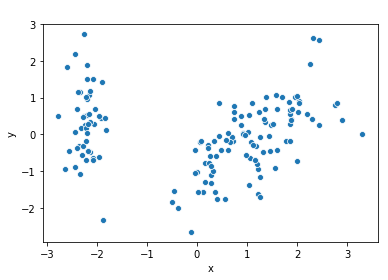

In [15]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
import seaborn as sns

# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(sf_df)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n", pca.explained_variance_)

# transform data
B = pca.transform(sf_df)

# plot data
df1 = pd.DataFrame(B)
df1 = df1.rename(columns={0:'x', 1:'y'})

df1.head()
sns.scatterplot(x='x', y='y', data=df1)
# plt.show()
# plt.scatter(df1['x'], df1['y'], color=['r', 'b'])
plt.title('Iris PCA', fontsize=15, color='w')
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)